In [ ]:
# RAPIDS kurulumu
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable
import os
os._exit(00)  # Runtime yeniden başlatılır

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 592, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 592 (delta 125), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (592/592), 194.79 KiB | 4.99 MiB/s, done.
Resolving deltas: 100% (299/299), done.
PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook.  We have also created a new startup template: 
https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9?usp=sharing

CHANGES T
CELL 1:
    # This get the RAPIDS-Colab install files and test check your GPU.  Run cells 1 and 2 only.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import joblib  # model kaydetmek için

sns.set_theme(style="darkgrid", palette="viridis")


Veri seti boyutu: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0



Eksik veri var mı?
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Veri tipleri:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       floa

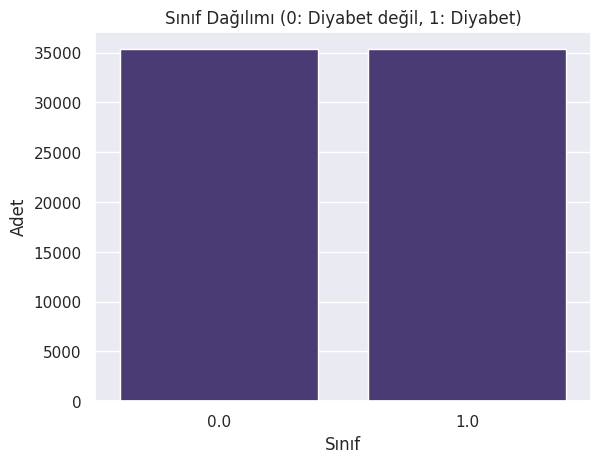

Diyabet olmayanlar: 50.00%
Diyabet olanlar: 50.00%


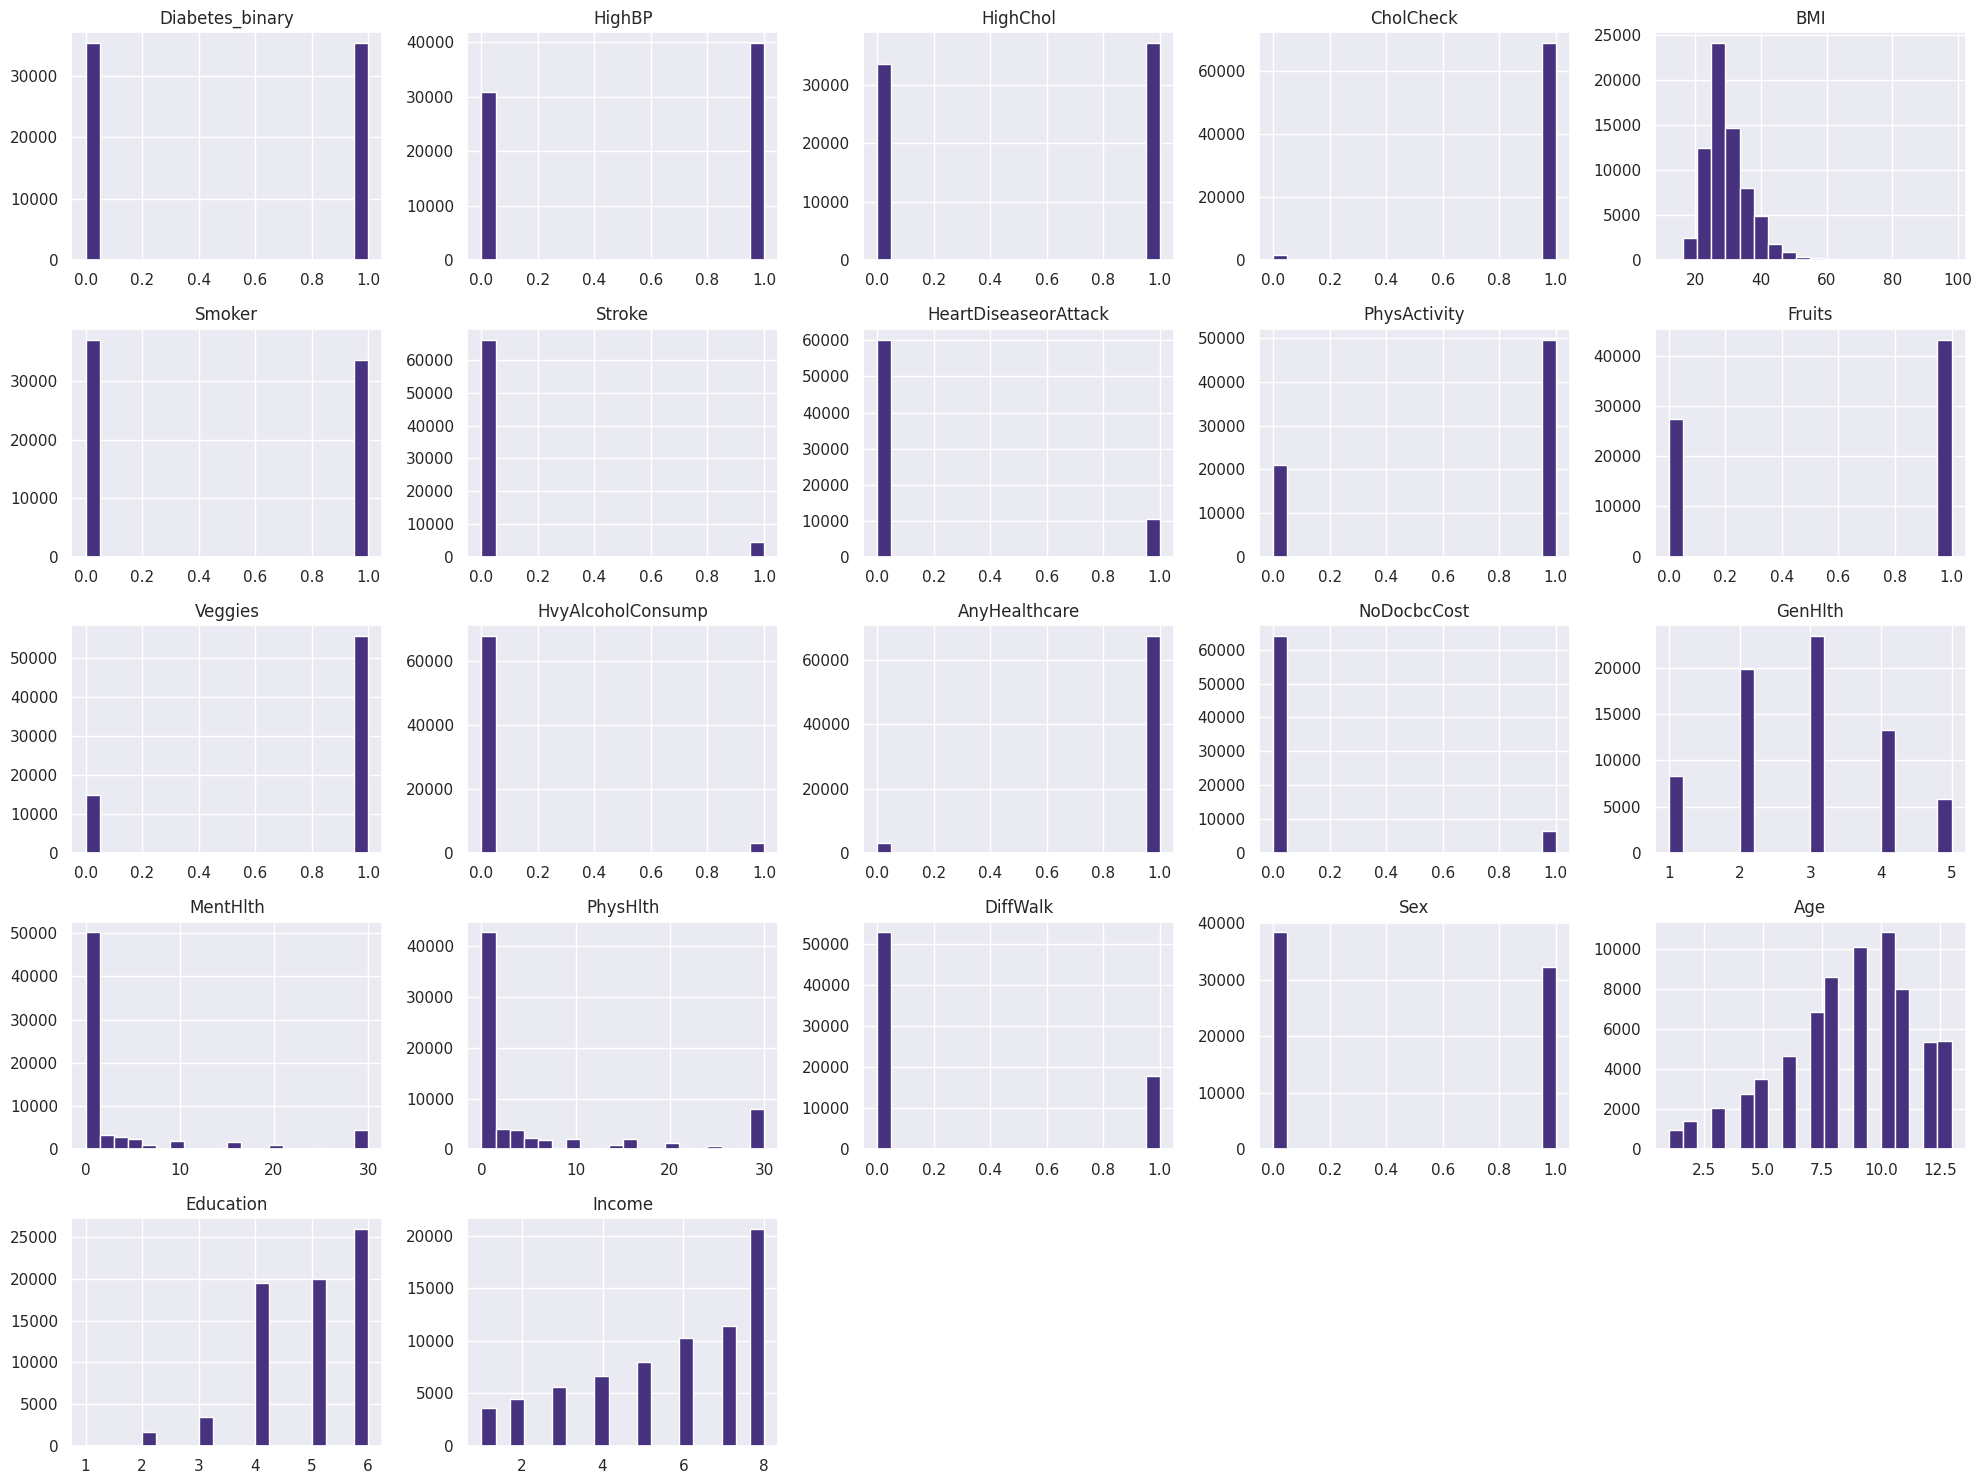

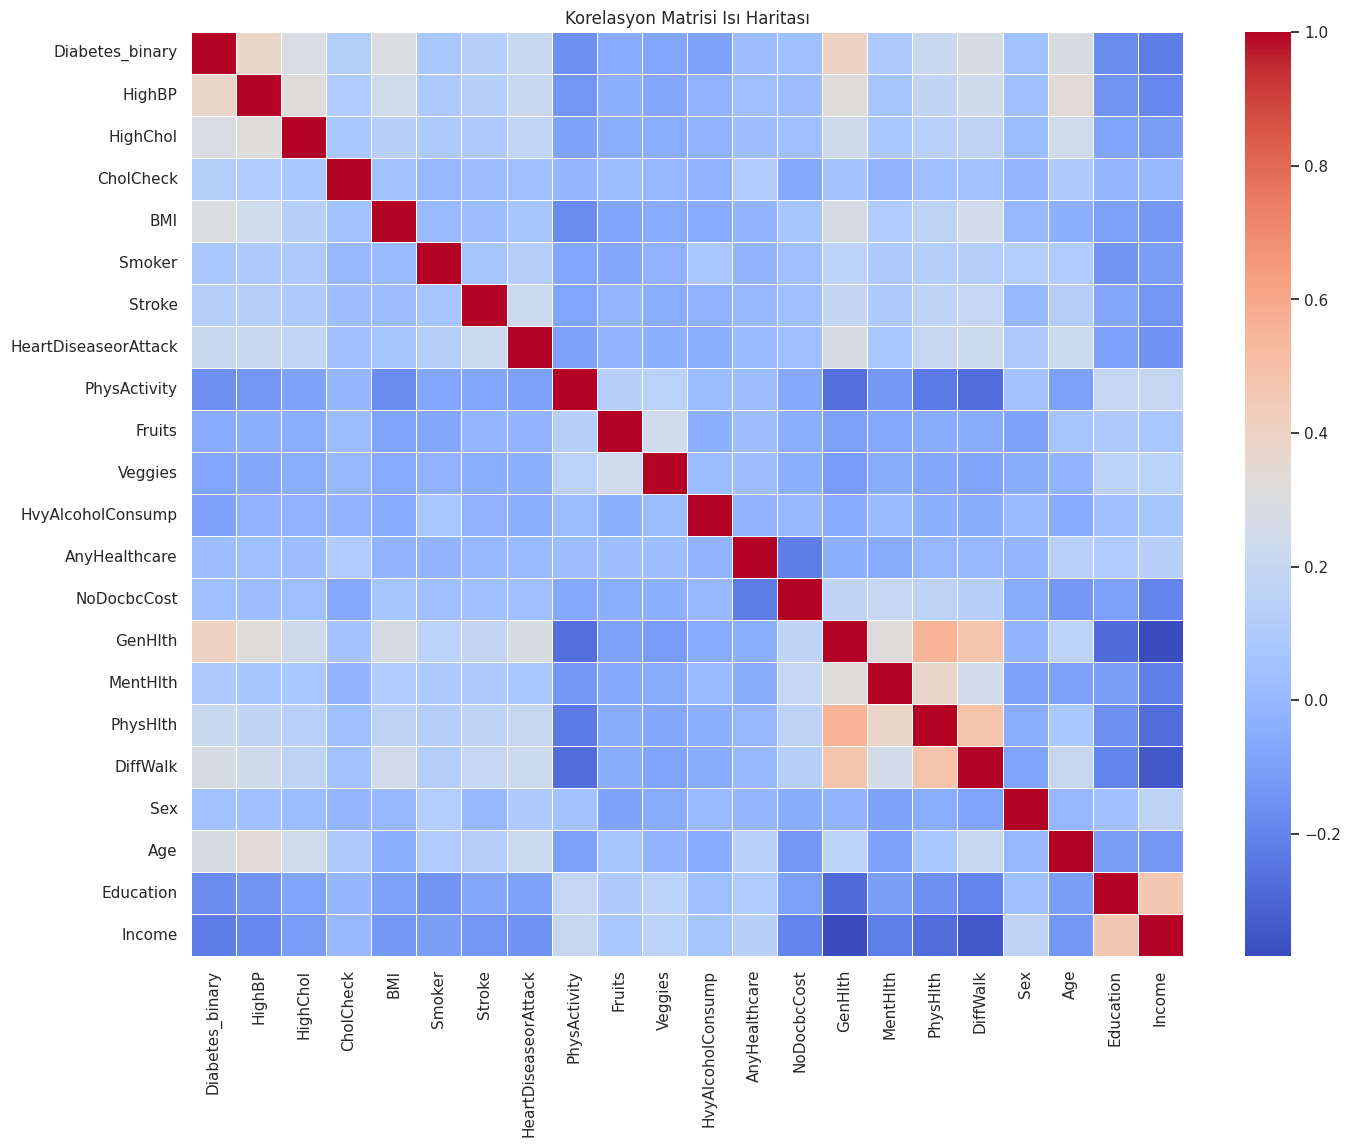

Diyabetle en çok korelasyonlu değişkenler:
 Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
Name: Diabetes_binary, dtype: float64


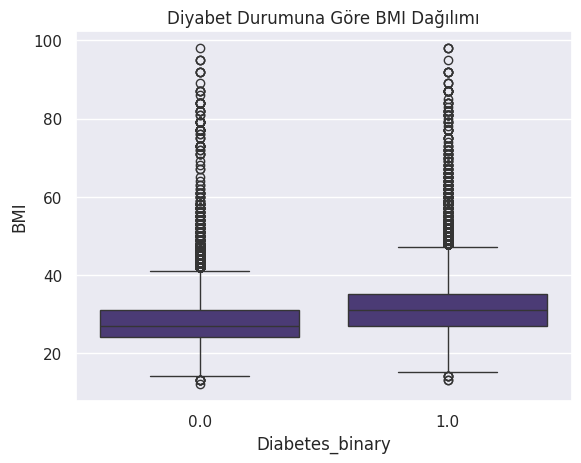

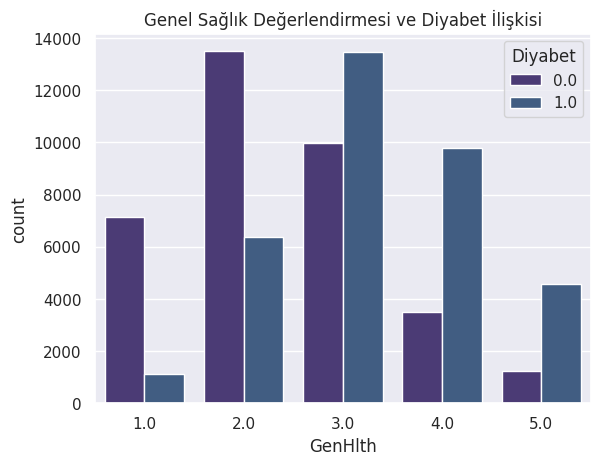

In [2]:
df = pd.read_csv('dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')


# Gereksiz sütunları çıkarmak için
low_variance_cols = df.nunique()[df.nunique() == 1].index.tolist()
df.drop(columns=low_variance_cols, inplace=True)

# Veri seti hakkında genel bilgi
print("Veri seti boyutu:", df.shape)
display(df.head()) #ilk 5 satır

# Eksik veri kontrolü
print("\nEksik veri var mı?")
print(df.isnull().sum())

# Veri tipleri
print("\nVeri tipleri:")
print(df.dtypes)

# Hedef değişken (Diabetes_binary) dağılımı
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Sınıf Dağılımı (0: Diyabet değil, 1: Diyabet)")
plt.xlabel("Sınıf")
plt.ylabel("Adet")
plt.show()

# Sınıf oranlarını da göstermek için
diabetes_counts = df['Diabetes_binary'].value_counts(normalize=True) * 100
print(f"Diyabet olmayanlar: {diabetes_counts[0]:.2f}%")
print(f"Diyabet olanlar: {diabetes_counts[1]:.2f}%")

# Tüm sayısal değişkenlerin dağılım grafikleri
df.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

# Korelasyon matrisi
corr = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()

target_corr = corr['Diabetes_binary'].sort_values(ascending=False)
print("Diyabetle en çok korelasyonlu değişkenler:\n", target_corr.head(10))

# Örneğin BMI (VKİ) değerlerinin sınıflara göre dağılımı
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title("Diyabet Durumuna Göre BMI Dağılımı")
plt.show()

# Bir başka örnek: GenHealth (Genel sağlık) kategorikse
if 'GenHlth' in df.columns:
    sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df)
    plt.title("Genel Sağlık Değerlendirmesi ve Diyabet İlişkisi")
    plt.legend(title='Diyabet')
    plt.show()


# Özellik ve etiket ayırma
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
#en başarılı modeli bulmak için
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df.sort_values(by="F1 Score", ascending=False)


,Accuracy,Precision,Recall,F1 Score
SVM,0.749841,0.724911,0.805206,0.762952
Logistic Regression,0.745809,0.737201,0.763899,0.750313
Random Forest,0.733149,0.717644,0.768708,0.742299
KNN,0.712992,0.702434,0.739001,0.720254


In [4]:
#en iyi model olan svm için:
best_svm = SVC(C=10, gamma=0.01, kernel='rbf')
best_svm.fit(X_train_scaled, y_train)

y_pred_svm = best_svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))


Accuracy: 0.7516797510432138
Precision: 0.7247347145022739
Recall: 0.8115716508699957
F1 Score: 0.765699032365699


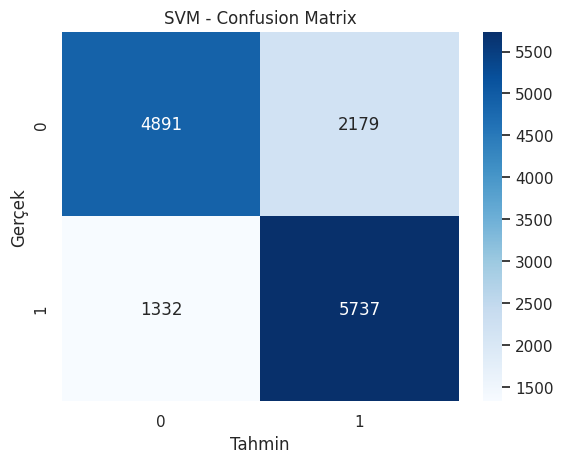

In [5]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("SVM - Confusion Matrix")
plt.show()


In [6]:
joblib.dump(best_svm, 'best_model_svm.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']